In [1]:
import sys

PWD = '../..'
sys.path.append(PWD)

DATASET_PATH = '../../data/dataset/dataset.pkl'
IMAGES_DIR = PWD + '/data/images/dataset_analysis/'

import pickle

import numpy as np
from matplotlib import pyplot as plt
from src.utils import save_plt

In [2]:
with open(DATASET_PATH, 'rb') as file:
    dataset = pickle.load(file)

# Timestamp distribution

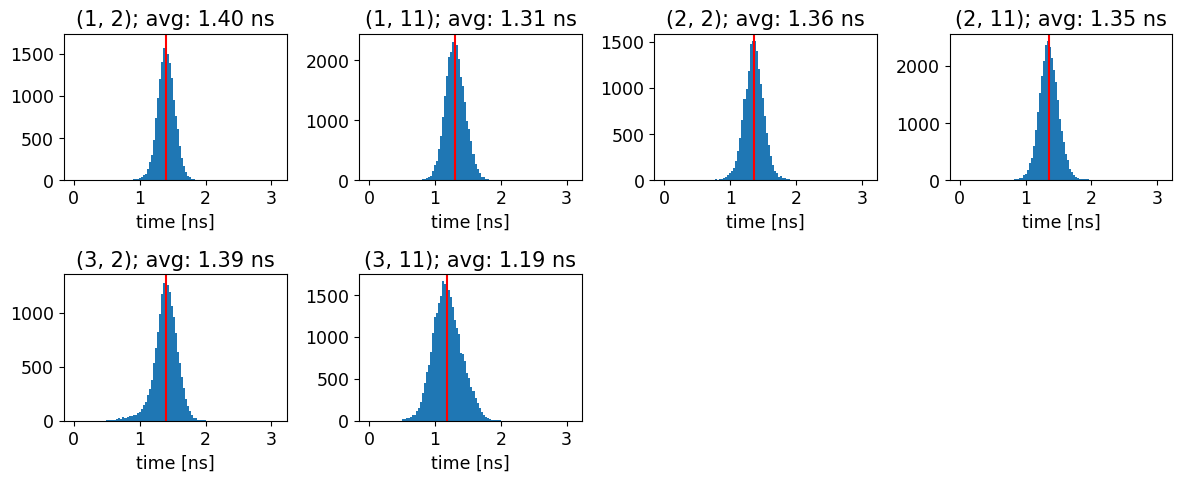

In [3]:
plt.figure(figsize=(12, 5))
plt.rc('font', size=12.5)
for i, ((plane, channel), data) in enumerate(sorted(dataset.items())):
    plt.subplot(2, 4, i + 1)
    plt.hist(data[1], range=[0, 24 / 7.8], bins=100)
    plt.xlabel('time [ns]')
    t_avg = np.mean(data[1])
    plt.axvline(t_avg, c='red')
    plt.title(f'({plane}, {channel}); avg: {t_avg:0.2f} ns')
    
plt.tight_layout()
save_plt(IMAGES_DIR + 'timestamp_distribution.pdf')
plt.show()

# Outliers

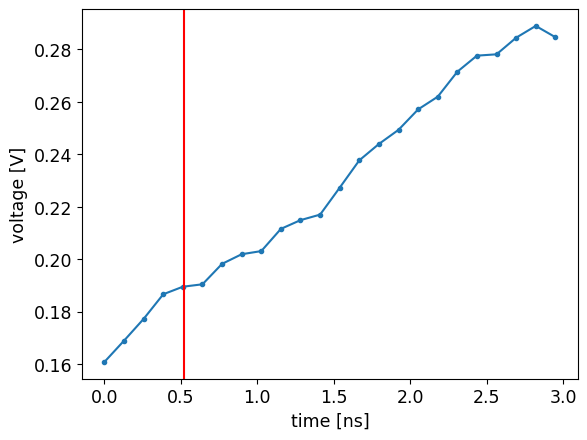

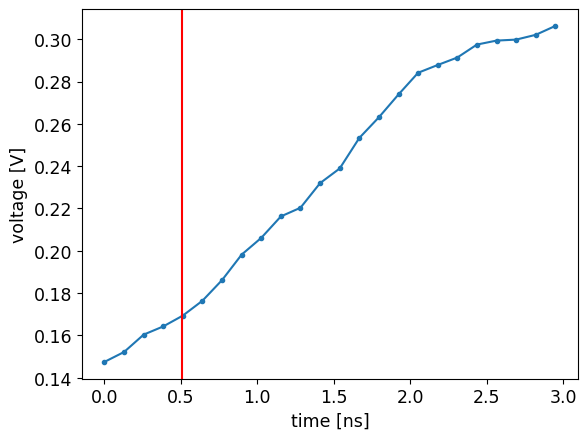

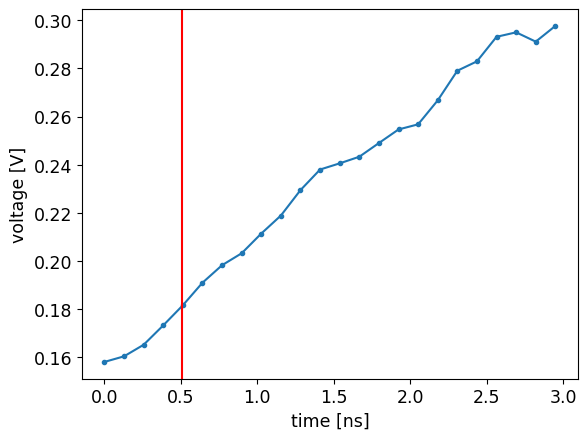

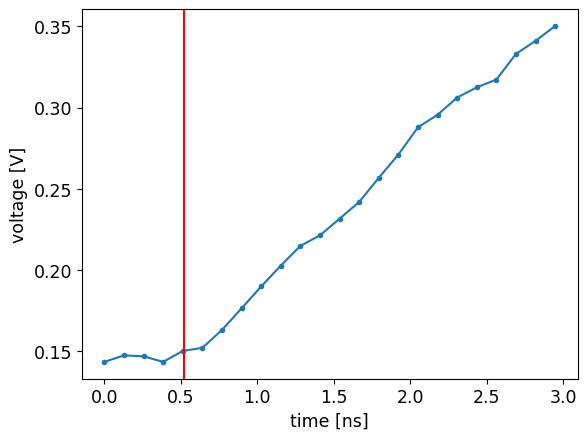

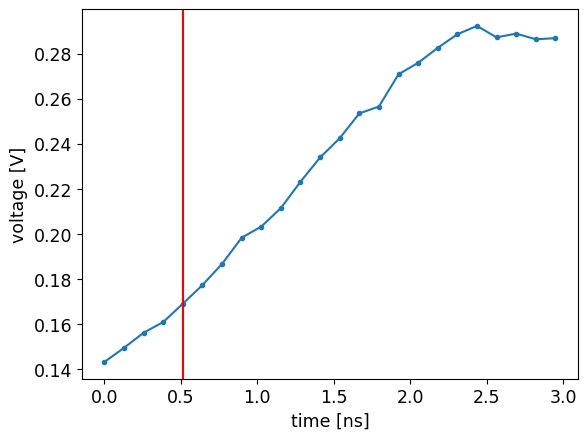

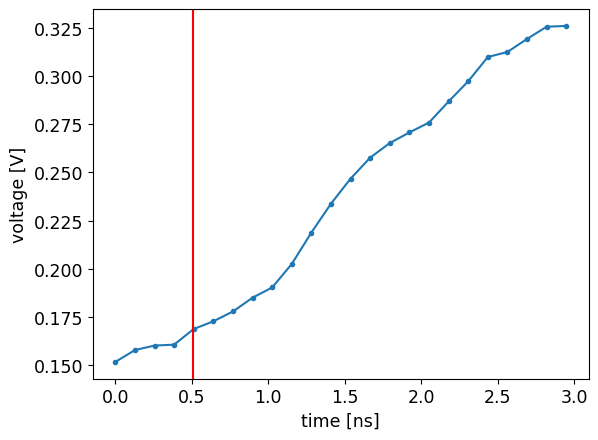

In [4]:
x, y = dataset[(3, 11)]
filt = y < 0.52
x, y = x[filt], y[filt]

for idx in [0, 1, 2, 3, 4, 5]:
    plt.plot(np.arange(0, 24 / 7.8 - 0.1, 1 / 7.8), x[idx], marker='.')
    plt.axvline(y[idx], c='red')
    plt.xlabel('time [ns]')
    plt.ylabel('voltage [V]')
    plt.show()